### Область работы 1 (библиотеки)

In [ ]:
#%pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.ensemble import RandomForestRegressor


### Область работы 2 (поиск  модели .... )

In [ ]:
path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
df_train=pd.read_csv(path_train)

In [ ]:
df_train

,company,model,year,condition,mileage(km),fuel,volume(cm3),color,transmission,drive_unit,vehicle_size_class,priceUSD
0,renault,laguna,2000,with mileage,230000.0,petrol,1800.0,blue,mechanics,front-wheel drive,D,2300
1,chrysler,pacifica,2005,with mileage,310000.0,petrol,3500.0,black,auto,front-wheel drive,NaN,6300
2,mercedes-benz,c-klass,2010,with mileage,115000.0,petrol,1800.0,gray,auto,rear drive,D,11200
3,hyundai,accent,2017,with mileage,45500.0,petrol,1400.0,gray,auto,front-wheel drive,B,10886
4,renault,kadjar,2016,with mileage,139000.0,diesel,1500.0,red,auto,front-wheel drive,J,15300
...,...,...,...,...,...,...,...,...,...,...,...,...
38000,renault,laguna,1999,with mileage,314000.0,petrol,1600.0,green,mechanics,front-wheel drive,D,1999
38001,opel,insignia,2010,with mileage,230000.0,petrol,1600.0,black,mechanics,front-wheel drive,D,7606
38002,kia,optima,2012,with mileage,115000.0,petrol,2400.0,black,mechanics,front-wheel drive,D,11850
38003,volkswagen,vento,1994,with mileage,300000.0,diesel,1900.0,white,mechanics,front-wheel drive,NaN,1200


In [ ]:
columns_to_exclude = ['company', 'model','mileage(km)','volume(cm3)','priceUSD']

for column in df_train.columns:
    if column not in columns_to_exclude:
        unique_values = df_train[column].unique()
        print(f"Уникальные значения в столбце {column}:\n{unique_values}\n")


Уникальные значения в столбце year:
[2000 2005 2010 2017 2016 1992 2014 1990 2008 1989 1997 1995 1996 2009
 2002 2018 2001 2004 2012 1994 1998 2006 1986 1999 1993 2011 2019 2003
 2015 2007 2013 1991 1988 1983 1979 1987 1981 1985 1970 1984 1982 1975
 1977 1965 1976 1968 1959 1978 1974 1980 1962 1964 1952 1969 1942 1910
 1960 1972 1966 1936 1951 1973 1957 1955 1956 1961 1954 1971 1963 1958
 1967 1945 1948]

Уникальные значения в столбце condition:
['with mileage' 'with damage' 'for parts']

Уникальные значения в столбце fuel:
['petrol' 'diesel']

Уникальные значения в столбце color:
['blue' 'black' 'gray' 'red' 'brown' 'burgundy' 'other' 'silver' 'white'
 'green' 'purple' 'orange' 'yellow']

Уникальные значения в столбце transmission:
['mechanics' 'auto']

Уникальные значения в столбце drive_unit:
['front-wheel drive' 'rear drive' 'all-wheel drive'
 'part-time four-wheel drive']

Уникальные значения в столбце vehicle_size_class:
['D' nan 'B' 'J' 'C' 'E' 'M' 'F' 'S' 'A']



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38005 entries, 0 to 38004
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             38005 non-null  object 
 1   model               38005 non-null  object 
 2   year                38005 non-null  int64  
 3   condition           38005 non-null  object 
 4   mileage(km)         38005 non-null  float64
 5   fuel                38005 non-null  object 
 6   volume(cm3)         38005 non-null  float64
 7   color               38005 non-null  object 
 8   transmission        38005 non-null  object 
 9   drive_unit          38005 non-null  object 
 10  vehicle_size_class  34434 non-null  object 
 11  priceUSD            38005 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.5+ MB


In [ ]:
df_train=df_train.drop_duplicates()

In [ ]:
df_train.describe()

,year,mileage(km),volume(cm3),priceUSD
count,37966.000000,3.796600e+04,37966.000000,37966.000000
mean,2003.470210,2.456127e+05,2103.037218,7426.446663
std,8.118807,3.286974e+05,925.478705,8406.013790
min,1910.000000,0.000000e+00,500.000000,48.000000
25%,1998.000000,1.380000e+05,1600.000000,2377.000000
50%,2004.000000,2.300000e+05,1997.000000,5399.000000
75%,2010.000000,3.100000e+05,2300.000000,9847.500000
max,2019.000000,9.999999e+06,20000.000000,235235.000000


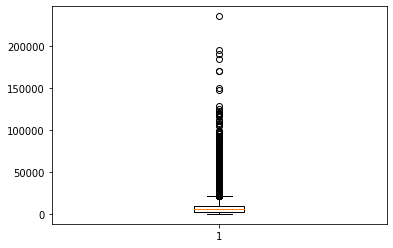

In [ ]:
plt.boxplot(df_train['priceUSD'])
plt.show()

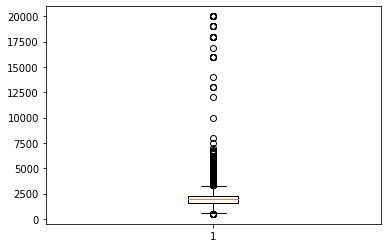

In [ ]:
plt.boxplot(df_train['volume(cm3)'])
plt.show()

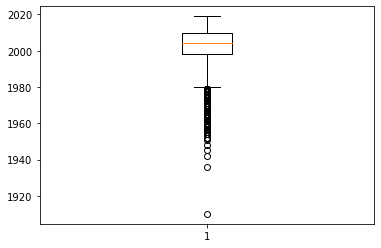

In [ ]:
plt.boxplot(df_train['year'])
plt.show()

In [ ]:
df_train = df_train.drop(df_train[df_train['priceUSD'] < 650].index)
df_train = df_train.drop(df_train[df_train['mileage(km)'] < 2].index)
df_train = df_train.drop(df_train[df_train['volume(cm3)'] > 9500].index)

df_train = df_train.drop(df_train[df_train['volume(cm3)'] < 600].index)



In [ ]:
df_target=df_train['priceUSD']
df_data=df_train.drop('priceUSD', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, random_state=53)

In [ ]:
print("X_train",X_train.shape )
print("y_train",y_train.shape )
print("X_test",X_test.shape )
print("y_test",y_test.shape )

X_train (27080, 11)
y_train (27080,)
X_test (9027, 11)
y_test (9027,)


In [ ]:
simple_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
std_scaler = StandardScaler()
imp = Pipeline([('imputer', simple_imputer)])
ohe_encoder = ce.OneHotEncoder(use_cat_names=True,handle_unknown='ignore')
ohe = Pipeline([('imputer', simple_imputer), ('encoder', ohe_encoder)])
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=1000)
enc = Pipeline([('encoder', ord_encoder),('scaler', std_scaler)])
CT = ColumnTransformer([
        ("num",std_scaler,['mileage(km)','volume(cm3)','year']),
        ("enc", enc, ['company','model']),
        ("ohe", ohe, ['condition','fuel','color','transmission','drive_unit','vehicle_size_class'])
        ])

## Соседи

In [ ]:
pipe = Pipeline([('preproc',CT),
                 ('preprocessing', MinMaxScaler()),
                 ('regressor',    KNeighborsRegressor())])

kfold = KFold(n_splits=5, shuffle=True, random_state = 42)

p = np.arange(1,3)
n_neighbors = np.arange(1,50)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler()]
#weights = ['uniform','distance'] weights=distance использовать не буду, т.к с ним score train=1, т.е идет переобучение
param_grid = {
    'preprocessing': scaling,
    'regressor': [KNeighborsRegressor()],
    'regressor__n_neighbors': n_neighbors,
    'regressor__p': p,
}


grid = GridSearchCV(pipe,param_grid, cv=kfold,verbose=4,return_train_score=True,scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train,y_train)
grid

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV 1/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=1, regressor__p=1;, score=(train=-0.001, test=-0.416) total time=   2.5s
[CV 2/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=1, regressor__p=1;, score=(train=-0.001, test=-0.392) total time=   2.3s
[CV 3/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=1, regressor__p=1;, score=(train=-0.001, test=-0.381) total time=   2.4s
[CV 4/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=1, regressor__p=1;, score=(train=-0.001, test=-0.401) total time=   2.2s
[CV 5/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=1, regressor__p=1;, score=(train=-0.001, test=-0.417) total time=   2.5s
[CV 1/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['mileage(km)',
                                                                          'volume(cm3)',
                                                                          'year']),
                                                                        ('enc',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=1000))]),
                                                                         ['company',
                                                                          'model']),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('imput...
             param_grid={'preprocessing': [MinMaxScaler(), StandardScaler(),
                                           RobustScaler()],
                         'regressor': [KNeighborsRegressor(n_neighbors=2)],
                         'regressor__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'regressor__p': array([1, 2])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=4)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

{'preprocessing': StandardScaler(), 'regressor': KNeighborsRegressor(n_neighbors=2), 'regressor__n_neighbors': 2, 'regressor__p': 2}
-0.3614643029708375


,101,100,198,200,102,103,202,98,104,99,204,105,199,206,201,203,196,106,208,205,107,207,210,209,212,108,2,109,211,3,197,214,0,213,1,110,215,216,111,217,...,62,55,64,57,66,68,59,70,72,61,74,63,76,65,78,67,80,69,82,84,71,86,73,88,90,75,92,77,94,96,79,81,83,85,87,89,91,93,95,97
mean_fit_time,0.146296,0.129963,0.147337,0.150694,0.132188,0.123356,0.150386,0.128381,0.136279,0.131611,0.149266,0.127613,0.14995,0.148533,0.147283,0.148163,0.146636,0.127093,0.149049,0.146592,0.128728,0.145367,0.158617,0.150815,0.150261,0.127969,0.136986,0.132395,0.148365,0.138215,0.150994,0.152263,0.135948,0.148426,0.136091,0.136082,0.150248,0.151551,0.133142,0.154035,...,0.131635,0.140898,0.133584,0.133117,0.126923,0.129435,0.134443,0.12744,0.122283,0.128984,0.125845,0.127724,0.124269,0.130075,0.123163,0.132562,0.125329,0.12501,0.12123,0.1193,0.120958,0.11738,0.132707,0.120844,0.125426,0.12709,0.126341,0.129576,0.121075,0.121363,0.120186,0.120349,0.119024,0.117434,0.121606,0.116037,0.123544,0.126218,0.119326,0.121847
std_fit_time,0.002684,0.006381,0.002694,0.004906,0.002578,0.002876,0.004781,0.006273,0.006631,0.007272,0.003596,0.007449,0.005482,0.004057,0.005739,0.002018,0.005103,0.005425,0.004704,0.002911,0.004704,0.004763,0.004916,0.006844,0.005643,0.003861,0.005012,0.003231,0.00288,0.006946,0.005937,0.008086,0.006969,0.002688,0.005558,0.005293,0.004042,0.00468,0.007405,0.008956,...,0.007459,0.007075,0.008762,0.004592,0.005706,0.00505,0.002087,0.004578,0.006004,0.003709,0.004883,0.002648,0.003614,0.004719,0.002791,0.004319,0.006484,0.005065,0.003861,0.003669,0.002218,0.002521,0.004366,0.00308,0.002018,0.005584,0.005214,0.002573,0.00407,0.002844,0.001754,0.002143,0.001472,0.001824,0.004244,0.003542,0.003011,0.003748,0.002689,0.003235
mean_score_time,0.34755,2.119617,2.088443,2.125136,2.140275,0.294919,2.141211,2.10607,2.14252,0.315249,2.152513,0.303728,0.298193,2.113106,0.300716,0.302388,2.155378,2.070133,2.11017,0.292805,0.310228,0.299526,2.266353,0.326337,2.102808,2.117524,2.215911,0.323537,0.318488,0.345499,0.307488,2.078531,2.250646,0.312927,0.33298,2.214399,0.308928,2.085935,0.327075,0.319026,...,2.235152,0.355338,2.239644,0.331684,2.141091,2.167042,0.34287,2.259805,2.166168,0.334581,2.221615,0.334593,2.174709,0.33711,2.107203,0.357911,2.14261,0.321616,2.136312,2.122957,0.321077,2.071197,0.34952,2.090542,2.207763,0.334271,2.158152,0.339778,2.155288,2.151044,0.333137,0.337275,0.324416,0.316273,0.305797,0.313828,0.342057,0.343753,0.341651,0.341045
std_score_time,0.006405,0.062281,0.035329,0.040139,0.036501,0.005941,0.085491,0.037892,0.074186,0.005584,0.042035,0.015997,0.007696,0.05719,0.016369,0.010137,0.038624,0.045378,0.038012,0.009934,0.01362,0.014649,0.093251,0.015896,0.048023,0.042742,0.040582,0.007877,0.018495,0.024883,0.010071,0.038301,0.094409,0.015324,0.006399,0.083781,0.004833,0.047293,0.007106,0.018575,...,0.056293,0.009052,0.069591,0.005752,0.070207,0.080255,0.014359,0.093117,0.075269,0.006393,0.03704,0.011464,0.061172,0.005226,0.041502,0.007248,0.03152,0.019882,0.053696,0.059772,0.007477,0.023139,0.01101,0.030225,0.031495,0.018082,0.074317,0.009652,0.058484,0.024517,0.009658,0.009895,0.01559,0.01187,0.007292,0.013258,0.011691,0.01104,0.008813,0.010396
param_preprocessing,StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()

In [ ]:
model =  Pipeline([('preproc',CT),
         #   ('preprocessing', StandardScaler()),
            ('regressor',     KNeighborsRegressor(n_neighbors=2, p=2))
            ])
model.fit(X_train, y_train)
knn_pr = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, knn_pr)
mape

0.29021233912058764

## Случайный лес

In [ ]:
pipe = Pipeline([('preproc',CT),
                 ('regressor',RandomForestRegressor(n_jobs=-1))])

kfold = KFold(n_splits=5, shuffle=True, random_state = 42)

n_estimators=[100,300,500]
max_features=['sqrt','log2',None]
min_samples_leaf=[1,2,3,4,7,10,15]
min_samples_split=[2,3,5,7,10,15]
param_dist = {
               'regressor': [RandomForestRegressor()],
               'regressor__n_estimators': n_estimators,
               'regressor__max_features': max_features,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf}

rand_cv = GridSearchCV(pipe,param_dist, cv=kfold,verbose=2,return_train_score=True,scoring='neg_mean_absolute_percentage_error')
rand_cv.fit(X_train,y_train)
rand_cv

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
[CV] END regressor=RandomForestRegressor(), regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   3.1s
[CV] END regressor=RandomForestRegressor(), regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   3.1s
[CV] END regressor=RandomForestRegressor(), regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   3.1s
[CV] END regressor=RandomForestRegressor(), regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   3.1s
[CV] END regressor=RandomForestRegressor(), regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   3.1s
[CV] END re

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['mileage(km)',
                                                                          'volume(cm3)',
                                                                          'year']),
                                                                        ('enc',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=1000))]),
                                                                         ['company',
                                                                          'model']),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('imput...
             param_grid={'regressor': [RandomForestRegressor(max_features=None,
                                                             min_samples_split=5,
                                                             n_estimators=500)],
                         'regressor__max_features': ['sqrt', 'log2', None],
                         'regressor__min_samples_leaf': [1, 2, 3, 4, 7, 10, 15],
                         'regressor__min_samples_split': [2, 3, 5, 7, 10, 15],
                         'regressor__n_estimators': [100, 300, 500]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=2)

In [ ]:
RF_result = pd.DataFrame(rand_cv.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
RF_result

,260,256,259,275,258,257,278,277,254,253,272,271,274,262,263,280,252,255,281,290,296,265,292,293,289,270,266,276,284,299,279,295,273,283,298,294,282,297,261,264,...,201,111,207,108,231,230,222,224,223,220,229,226,218,221,233,219,227,217,232,228,225,216,246,248,238,241,250,235,242,239,251,247,245,243,244,249,236,240,234,237
mean_fit_time,46.797796,30.159934,28.23224,45.39388,9.421652,50.444356,43.958548,26.358518,53.203042,32.266107,45.187698,27.111704,27.365391,26.957065,44.793473,25.316839,10.817306,10.116193,42.293641,41.701885,41.598285,25.554879,24.784911,41.201321,24.944173,9.142903,43.005859,8.867243,40.488467,41.170395,8.554682,25.116369,9.147166,24.456876,24.754476,8.405423,8.284937,8.343379,9.016166,8.648452,...,1.369905,1.392668,1.362189,1.383745,1.290358,5.98665,1.305701,5.95316,3.660006,3.625197,3.626872,3.63076,6.0408,6.041206,5.962597,1.304487,5.971356,3.67975,3.617169,1.299,1.280548,1.299133,1.23712,5.68388,3.421095,3.408897,3.44739,3.399462,5.642393,5.615047,5.674951,3.451264,5.63837,1.235212,3.434744,1.239989,5.603796,1.207869,1.208421,1.212639
std_fit_time,0.176568,0.130037,0.270047,0.306385,0.03988,0.165186,0.301642,0.143511,0.427096,0.116313,0.250228,0.067125,0.163131,0.116611,0.155292,0.075084,0.083773,0.044825,0.329562,0.098608,0.424181,0.05004,0.141655,0.159791,0.241549,0.05057,0.184944,0.065595,0.289754,0.158974,0.044541,0.097869,0.098069,0.038573,0.093159,0.110235,0.051057,0.070643,0.025791,0.05839,...,0.008323,0.008344,0.005594,0.012732,0.014958,0.074292,0.013234,0.023411,0.030551,0.03388,0.010124,0.014672,0.029137,0.041113,0.036205,0.012223,0.040104,0.024387,0.015472,0.015377,0.009112,0.011534,0.007919,0.02877,0.029083,0.025391,0.016272,0.009322,0.042307,0.042926,0.030142,0.018074,0.030143,0.012346,0.034343,0.021813,0.029598,0.010868,0.010928,0.010162
mean_score_time,0.599337,0.410468,0.367241,0.592794,0.137344,0.676289,0.563938,0.347245,0.759724,0.464591,0.591658,0.362898,0.365107,0.34266,0.554908,0.327233,0.168774,0.152188,0.532433,0.532312,0.532844,0.324167,0.326364,0.525173,0.327714,0.138468,0.522477,0.134417,0.501655,0.520752,0.129936,0.332355,0.138134,0.31299,0.323024,0.126021,0.122756,0.126176,0.132067,0.125727,...,0.093209,0.08618,0.091767,0.084991,0.087407,0.330297,0.087466,0.334214,0.211813,0.209519,0.210666,0.208362,0.335419,0.333751,0.330058,0.089471,0.333645,0.212224,0.209848,0.086608,0.087135,0.086957,0.08292,0.309624,0.196999,0.196851,0.195328,0.194035,0.311125,0.314211,0.30842,0.196798,0.309038,0.083301,0.196174,0.083135,0.307183,0.081614,0.081254,0.081637
std_score_time,0.002124,0.002674,0.000205,0.003709,0.001085,0.001248,0.002278,0.003634,0.005453,0.00334,0.002584,0.001411,0.001001,0.002318,0.001892,0.003721,0.001095,0.000389,0.002291,0.003998,0.00663,0.002623,0.000888,0.004146,0.003494,0.000856,0.003671,0.001026,0.003618,0.003979,0.005621,0.001164,0.000744,0.002164,0.001873,0.001486,0.000789,0.003229,0.000617,0.001484,...,0.0011,0.001458,0.000779,0.000832,0.001656,0.002993,0.000524,0.005701,0.003944,0.00148,0.00191,0.000837,0.003459,0.003862,0.001887,0.002869,0.003207,0.001707,0.001482,0.000894,0.001652,0.000385,0.001062,0.002406,0.004749,0.003101,0.001616,0.001472,0.007468,0.004974,0.001716,0.002117,0.002815,0.001053,0.001487,0.000734,0.001666,0.000482,0.00062,0.000631
param_regressor,"RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_features=None, min_s...","RandomForestRegressor(max_featu

In [ ]:
model = Pipeline([('preproc',CT),
                  ('regressor',RandomForestRegressor(n_estimators=800,min_samples_leaf=1,min_samples_split=5,max_features=None,random_state=53,n_jobs=-1))
                 ])

model.fit(X_train, y_train)
RF = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, RF)
mape


0.20548222683305906

In [ ]:
#n_estimators=800,min_samples_leaf=1,min_samples_split=5,max_features=None это пока лучшая
# n_est=500,min_sample_leaf=2 ,none
# n_estimators=300,min_samples_leaf=2,max_features=None)



## LinearRegression

In [ ]:
pipe = Pipeline([('preproc',CT),
                 ('preprocessing', MinMaxScaler()),
                 ('regressor',    LinearRegression())])
kfold = KFold(n_splits=10, shuffle=True, random_state = 42)
scores='neg_mean_absolute_percentage_error'
fit_intercept=[True,False]
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler()]
param_grid = {
    'preprocessing': scaling,
    'regressor': [LinearRegression(n_jobs=-1)],
    'regressor__fit_intercept': fit_intercept,
}


LR = GridSearchCV(pipe,param_grid, cv=kfold,return_train_score=True,scoring='neg_mean_absolute_percentage_error')
LR.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['mileage(km)',
                                                                          'volume(cm3)',
                                                                          'year']),
                                                                        ('enc',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=1000)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['company',
                                                                          'model'])...
                                                                          'drive_unit',
                                                                          'vehicle_size_class'])])),
                                       ('preprocessing', MinMaxScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'preprocessing': [MinMaxScaler(), StandardScaler(),
                                           RobustScaler()],
                         'regressor': [LinearRegression(fit_intercept=False,
                                                        n_jobs=-1)],
                         'regressor__fit_intercept': [True, False]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
print(LR.best_score_)

-0.6832095864277906


## Ridge

In [ ]:
pipe = Pipeline([('preproc',CT),
                 ('preprocessing', MinMaxScaler()),
                 ('regressor',    Ridge())])
kfold = KFold(n_splits=10, shuffle=True, random_state = 42)
alpha=[0.1,1.0,10.0,100.0,1000.0,10000.0]
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()]
param_grid = {
    'preprocessing': scaling,
    'regressor': [Ridge()],
    'regressor__alpha': alpha,
}


ridgrid = GridSearchCV(pipe,param_grid, cv=kfold,return_train_score=True,scoring='neg_mean_absolute_percentage_error')
ridgrid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['mileage(km)',
                                                                          'volume(cm3)',
                                                                          'year']),
                                                                        ('enc',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=1000)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['company',
                                                                          'model'])...
                                                                          'transmission',
                                                                          'drive_unit',
                                                                          'vehicle_size_class'])])),
                                       ('preprocessing', MinMaxScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'preprocessing': [MinMaxScaler(), StandardScaler(),
                                           RobustScaler(), Normalizer()],
                         'regressor': [Ridge(alpha=1000.0)],
                         'regressor__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0,
                                              10000.0]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
print(ridgrid.best_score_)

-0.5307322834487884


## Lasso

In [ ]:
pipe = Pipeline([('preproc',CT),
                 ('preprocessing', MinMaxScaler()),
                 ('regressor',    Lasso())])
kfold = KFold(n_splits=5, shuffle=True, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()]
alpha=[1.0,10.0,100.0,1000.0]
param_grid = {'preprocessing': scaling,'regressor': [Lasso()],'regressor__alpha': alpha}
lasso = GridSearchCV(pipe,param_grid, cv=kfold,return_train_score=True,verbose=1,scoring='neg_mean_absolute_percentage_error')
lasso.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['mileage(km)',
                                                                          'volume(cm3)',
                                                                          'year']),
                                                                        ('enc',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=1000)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['company',
                                                                          'model']),...
                                                                          'transmission',
                                                                          'drive_unit',
                                                                          'vehicle_size_class'])])),
                                       ('preprocessing', MinMaxScaler()),
                                       ('regressor', Lasso())]),
             param_grid={'preprocessing': [MinMaxScaler(), StandardScaler(),
                                           RobustScaler(), Normalizer()],
                         'regressor': [Lasso(alpha=100.0)],
                         'regressor__alpha': [1.0, 10.0, 100.0, 1000.0]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [ ]:
print(lasso.best_score_)

-0.5868840361697902


In [ ]:
model = Pipeline([('preproc',CT),
                  ('regressor',RandomForestRegressor(n_estimators=800,min_samples_leaf=1,min_samples_split=5,max_features=None,random_state=53,n_jobs=-1))
                 ])

model.fit(X_train, y_train)
RF = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, RF)
mape
# в итоге эта модель оказалась лучшей

0.20548222683305906